In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
X_norm = StandardScaler().fit(X_cancer).transform(X_cancer)
pca = PCA(n_components=2).fit(X_norm)
X_pca = pca.transform(X_norm)
print X_cancer.shape, X_pca.shape

(569L, 30L) (569L, 2L)


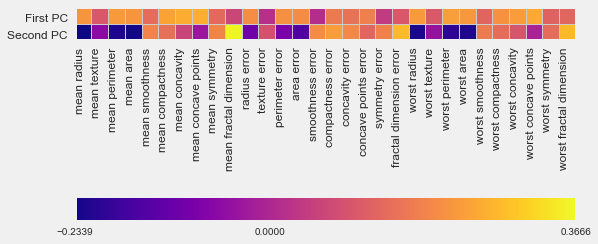

In [6]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

In [7]:
from adspy_shared_utilities import plot_labelled_scatter

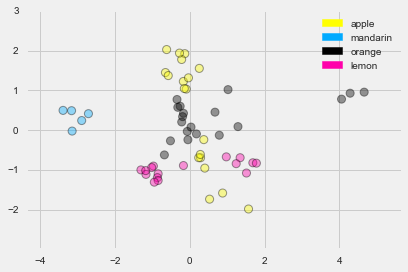

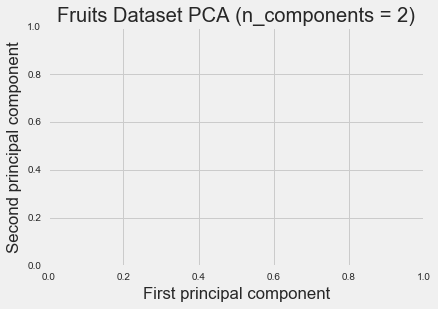

In [8]:
# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

In [9]:
from sklearn.manifold import MDS

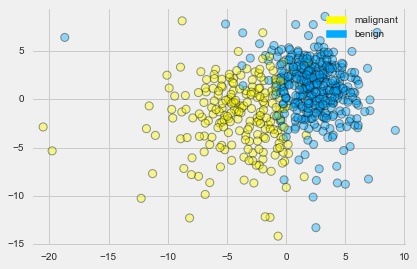

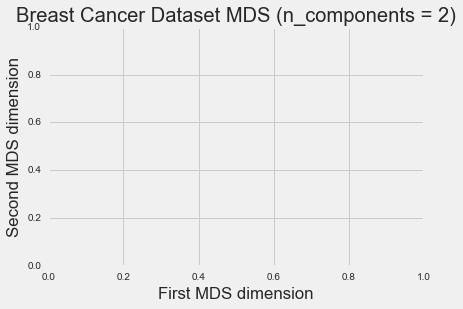

In [10]:
# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

In [11]:
from sklearn.manifold import TSNE

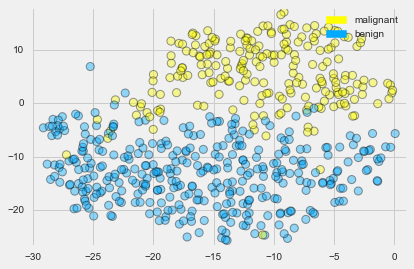

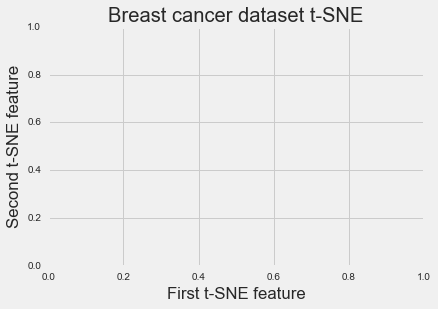

In [12]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

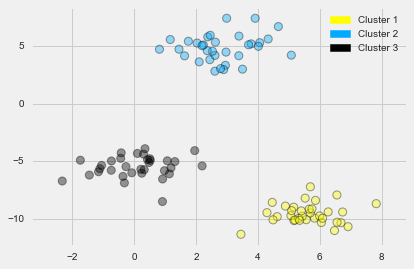

In [14]:
X, y = make_blobs(random_state=10)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ["Cluster 1", "Cluster 2", "Cluster 3"])